In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## 대우데이터
1. 봉급생활자, 자영업자의 월소득 평균, 중앙값, 표준편차를 구하라. 봉급생활자와 자영업자간 근로소득의 분포가 어떻게 다른지 논하라


2. 봉급생활자와 자영업자 집단에서 `연령`과 `소득` 의 관계를 분석하고자 한다. 하부 집단별로 평균 근로소득을 구하고, 연령과 소득의 관계를 그래프로 표현하라. 한 개인의 소득이 연령에 따라 어떻게 변화해 가는지 알 수 있는가? 있다면 관계를 설명하고 없다면 이유를 말하라.


3. 음주가 소득에 미치는 영향을 분석하고자 한다. 음주와 소득의 관계에 혼동요인으로 작용할 가능성이 있는 변수를 둘 이상 제시하고 이유를 설명하라. 음주자는 P2 = 1, 비음주자는 P2 = 2 다.
---
데이터 상세
* JOB1 : 1. 봉급생활 2. 자영업
* P19 : 봉급생활자 평균 월 수입
* P29 : 자영업자 평균 월 수입
* AGE1 : 나이( 1인 가구는 AGE2 가 결측치)
* P : 1. 음주 2. 비음주

In [2]:
# load data
data_route = r'D:\document\data\daewoo.xls'
df_daewoo = pd.read_excel(data_route, encoding='utf-8-sig')

1. 봉급생활자의 평균 소득은 109만원, 표준편차는 39만원이다.자영업자의 평균 소득은 155만원, 표준편차는 87만원이다. 봉급생활자는 자영업자에 비해 평균적으로 월 수입이 적지만 망할 가능성도 낮다고 볼 수 있다.

,Salary,Owner
count,235.000000,146.000000
mean,109.736170,155.328767
std,39.159527,87.520568
min,35.000000,5.000000
25%,80.000000,100.000000
50%,100.000000,140.000000
75%,130.000000,200.000000
max,300.000000,500.000000


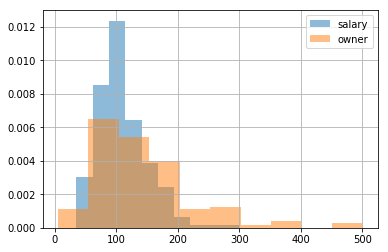

In [3]:
ser_salary_income = df_daewoo[df_daewoo['JOB1'] == 1]['P19']
ser_owner_income = df_daewoo[df_daewoo['JOB1'] == 2]['P29']

list_income_summary = [ser_salary_income.describe(), ser_owner_income.describe()]
df_income_summary = pd.concat(list_income_summary, axis = 1)
df_income_summary.rename(columns = {'P19': 'Salary', 'P29':'Owner'}, inplace=True)
display(df_income_summary)

ser_salary_income.hist(alpha=.5, label='salary',density=True)
ser_owner_income.hist(alpha=.5, label='owner', density=True)
plt.legend()
plt.show()

2. 봉급생활자의 월급 평균은 전 연령에서 큰 차이가 없어보인다. 45세까지는 증가하고 이후부터 감소하다가 다시 증가한다. 반면 자영업자의 월 평균 소득은 [35, 40) 구간에서 가장 높았으며 나머지 구간에서는 패턴을 찾을 수 없다. 해당 데이터는 횡단면자료기 때문에 개인의 연령에 따른 소득 변화를 알아볼 수 없다. 개인별 월 평균 소득 시계열자료나 종적자료가 있으면 분석할 수 있다.

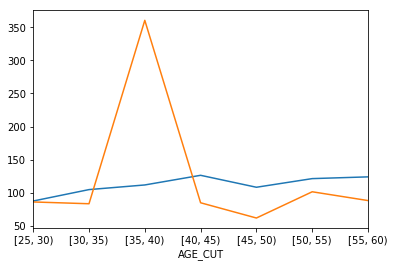

In [61]:
salary_age_cut_mean.plot()
owner_age_cut_mean.plot()

In [4]:
# 구간 나누기
age_cut = pd.cut(df_daewoo['AGE1'], np.array([25, 30, 35, 40, 45, 50, 55, 60]), right=False)
df_daewoo['AGE_CUT'] = age_cut

df_salary = df_daewoo[df_daewoo['JOB1'] == 1]
df_owner = df_daewoo[df_daewoo['JOB1'] == 2]

# 연령에 따른 월 평균 소득
salary_age_cut_mean = df_salary.groupby(['AGE_CUT'])['P19'].mean()
owner_age_cut_mean = df_owner.groupby(['AGE_CUT'])['P23'].mean()

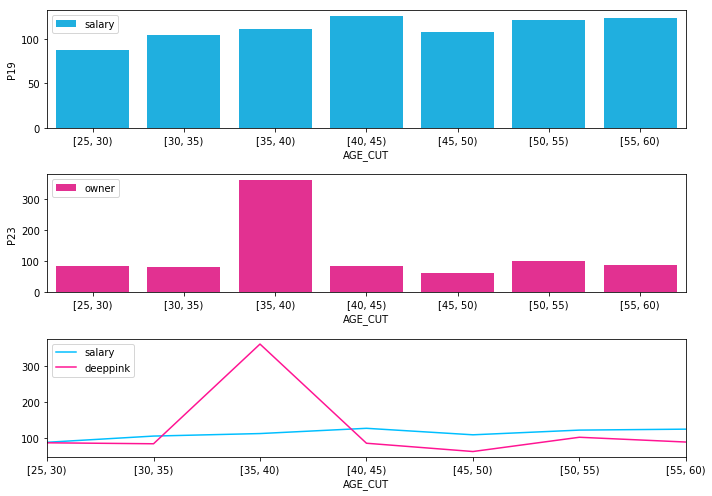

In [64]:
fig, ax = plt.subplots(3, 1, figsize=(10,7))
sb.barplot(x=salary_age_cut_mean.index, y=salary_age_cut_mean, 
           color = 'deepskyblue', label='salary', ax=ax[0])
sb.barplot(x=owner_age_cut_mean.index, y=owner_age_cut_mean,
           color = 'deeppink', label='owner', ax=ax[1])

salary_age_cut_mean.plot(ax=ax[2], color='deepskyblue', label='salary')
owner_age_cut_mean.plot(ax=ax[2], color='deeppink', label='deeppink')

ax[0].legend(loc='upper left')
ax[1].legend(loc='upper left')
ax[2].legend(loc='upper left')

plt.tight_layout()
plt.show()

3.음주와 소득의 관계
봉급생활자와 자영업자 모두 음주자가 비음주자보다 평균 소득이 높다. 특히 자영업자 집단은 음주자가 평균 80만원 이상 월 수익이 높다.

* 혼동요인
    * 나이 : [35,40) 구간에서 음주 비율이 80퍼센트에 달하는 반면 50대 이상의 음주비율은 50% 다. 자영업자 집단에서 [35, 40) 구간의 평균 월 소득이 가장 높다. 음주 여부에 따른 평균 월 소득 차이는 `나이` 라는 혼동요인에 영향을 받는다.

In [29]:
# 음주자와 비음주자의 평균 소득
display(df_salary.groupby(['P2'])['P19'].mean())  # 봉급생활자
display(df_owner.groupby(['P2'])['P23'].mean())  # 자영업자

P2
1    110.720670
2    106.589286
Name: P19, dtype: float64

P2
1    172.935185
2     93.119048
Name: P23, dtype: float64

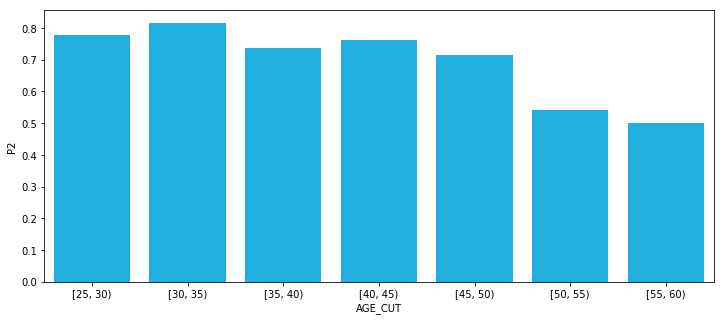

In [40]:
# 나이대별 음주자 비율
plt.figure(figsize=(12,5))
age_cut_soju = df_daewoo.groupby(['AGE_CUT'])['P2'].apply(lambda x : (x == 1).mean())
sb.barplot(age_cut_soju.index, age_cut_soju, color='deepskyblue')
plt.show()

## 강남구 아파트 가격데이터
1. 아파트 가격의 평균 및 최빈값을 구하고 그 결과가 히스토그램 모양에 어떻게 영향을 미치는지 말하라


* 평균 : 37713.877 만원
* 최빈구간 : (24875.0, 26000.0]

최빈구간이 평균보다 작기에 오른쪽으로 꼬리가 생가는 분포를 이룬다.

In [70]:
data_route = r'D:\document\data\apartment_sales.xls'
df_apt = pd.read_excel(data_route, encoding='utf-8-sig')
df_apt.describe()

,시세(하한),시세(상한),지하철,건축년도,평 수,연 령,지하철1개 노선,지하철 2개노선,대기업더미,단지규모
count,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000
mean,35179.872881,40247.881356,0.830508,1985.203390,37.504237,14.796610,0.720339,0.055085,0.148305,1109.877119
std,19325.768477,23302.745153,0.501997,5.916525,12.790122,5.916525,0.449787,0.228631,0.356158,989.467421
min,8750.000000,2000.000000,0.000000,1976.000000,14.000000,1.000000,0.000000,0.000000,0.000000,106.000000
25%,22000.000000,25000.000000,1.000000,1980.000000,29.000000,9.000000,0.000000,0.000000,0.000000,424.000000
50%,28000.000000,33000.000000,1.000000,1984.000000,34.000000,16.000000,1.000000,0.000000,0.000000,732.000000
75%,49250.000000,55500.000000,1.000000,1991.000000,47.000000,20.000000,1.000000,0.000000,0.000000,1232.000000
max,140000.000000,160000.000000,2.000000,1999.000000,80.000000,24.000000,1.000000,1.000000,1.000000,4424.000000


In [71]:
# 시세 평균
df_apt['시세(평균)'] = (df_apt['시세(하한)']+df_apt['시세(상한)'])/2

(24875.0, 26000.0]     17
(18562.5, 21500.0]     14
(73000.0, 150000.0]    12
(30250.0, 32625.0]     12
(13150.0, 16425.0]     12
(16425.0, 18562.5]     12
(23937.5, 24875.0]     12
(65750.0, 73000.0]     12
(28187.5, 30250.0]     12
(32625.0, 35000.0]     12
(41750.0, 46750.0]     12
(46750.0, 52125.0]     12
(52125.0, 56500.0]     12
(59375.0, 65750.0]     12
(8999.999, 13150.0]    12
(35000.0, 41750.0]     11
(56500.0, 59375.0]     11
(27000.0, 28187.5]      9
(26000.0, 27000.0]      9
(21500.0, 23937.5]      9
Name: 시세(평균), dtype: int64

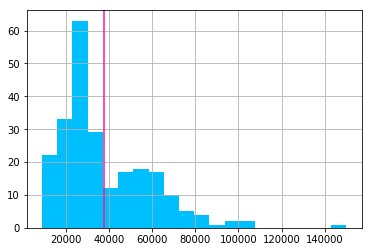

In [88]:
df_apt['시세(평균)'].hist(bins = 20, color='deepskyblue')
plt.axvline(df_apt['시세(평균)'].mean(), color='deeppink')
display(pd.qcut(df_apt['시세(평균)'], 20).value_counts())
plt.show()